In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa 
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob('./TrimSounds/*.wav')

In [3]:
# Play audio file
ipd.Audio(audio_files[0])

In [4]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-8.4200874e-05  7.4644573e-05  3.6589801e-05  1.4242437e-04
  1.3712654e-04  2.2234721e-04  2.7747825e-05  5.7048816e-04
  1.8143747e-04  4.4223247e-04]
shape y: (8246,)
sr: 22050


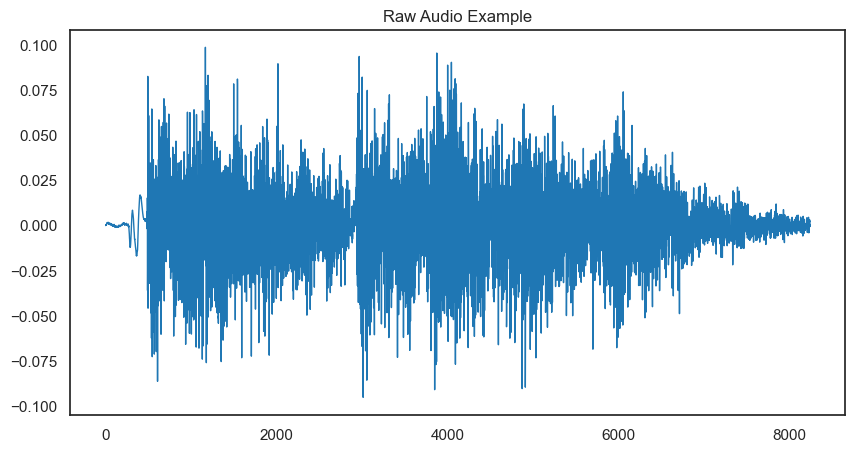

In [5]:
pd.Series(y).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Example',
                  color=color_pal[0])
plt.show()

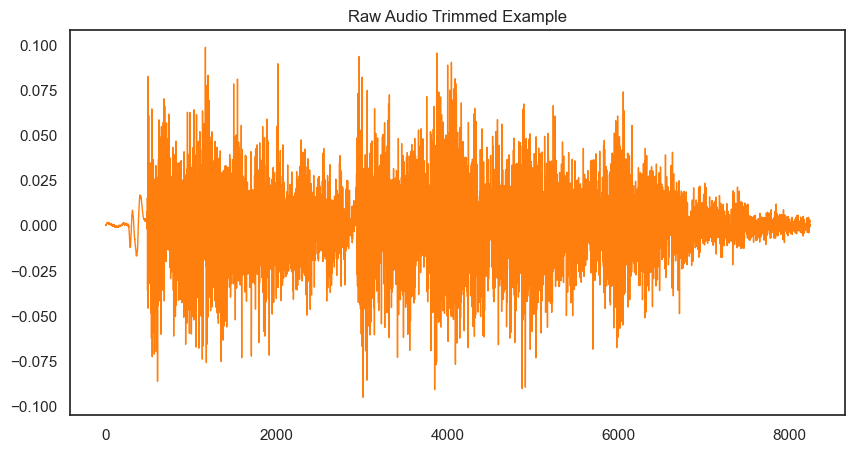

In [6]:
y_trimmed = librosa.effects.trim(y, top_db=20)

pd.Series(y).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Trimmed Example',
                  color=color_pal[1])
plt.show()

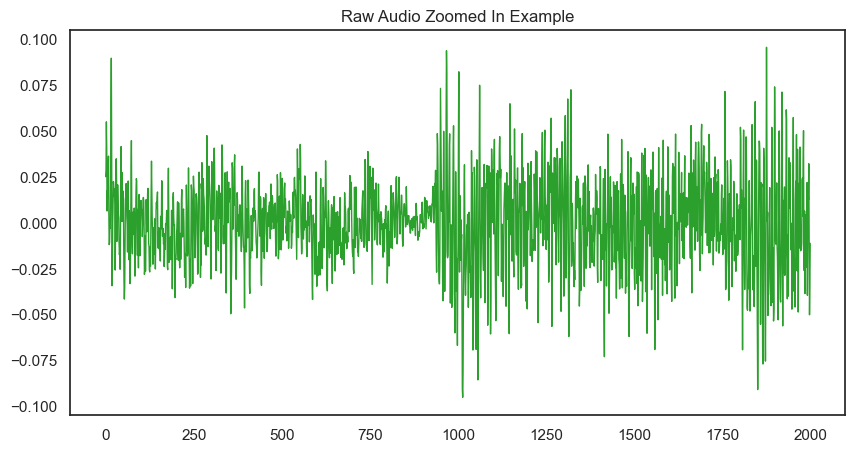

In [7]:
pd.Series(y[2000:4000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [8]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 17)

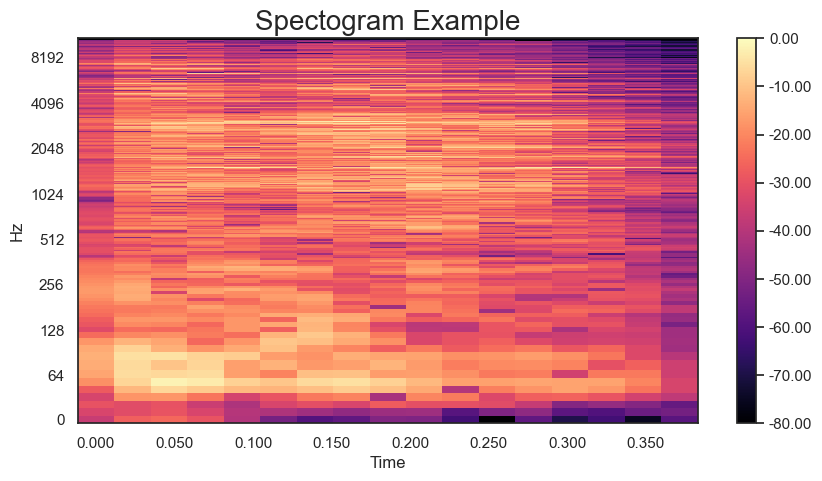

In [13]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, 
                               x_axis='time',
                               y_axis='log',
                               ax = ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()